In [1]:
# Importing Libraries

# Data handling and statistical analysis 
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data 
import quantstats as qs
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting daily returns for 4 different US stocks in the same time window
today = datetime.today()
start_date = today - relativedelta(years=5)

gs = qs.utils.download_returns('GS')
gs = gs.loc[start_date:today]

axp = qs.utils.download_returns('AXP')
axp = axp.loc[start_date:today]

low = qs.utils.download_returns('LOW')
low = low.loc[start_date:today]

amd = qs.utils.download_returns('AMD')
amd = amd.loc[start_date:today]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Converting timezone
gs.index = gs.index.tz_localize(None)
axp.index = axp.index.tz_localize(None)
low.index = low.index.tz_localize(None)
amd.index = amd.index.tz_localize(None)




Goldman Sachs Daily Returns Plot:



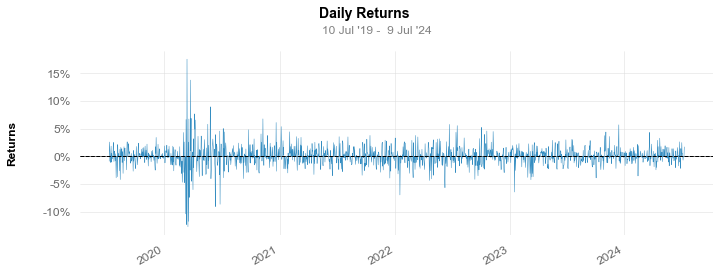






Amex Daily Returns Plot:



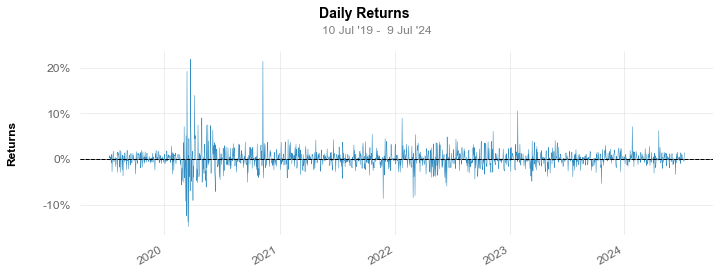






Lowes Daily Returns Plot:



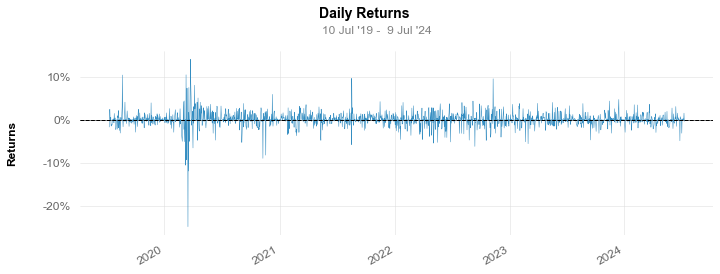






Advances Micro Devices, Inc. Daily Returns Plot:



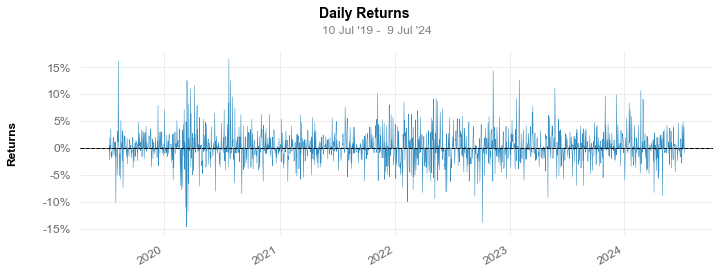

In [4]:
# Plotting Daily Returns for each stock
print('\n')
print('\nGoldman Sachs Daily Returns Plot:\n')
qs.plots.daily_returns(gs, benchmark='URTH') # benchmark is MSCI World Index 
print('\n')
print('\n')
print('\nAmex Daily Returns Plot:\n')
qs.plots.daily_returns(axp, benchmark='URTH')
print('\n')
print('\n')
print('\nLowes Daily Returns Plot:\n')
qs.plots.daily_returns(low, benchmark='URTH')
print('\n')
print('\n')
print('\nAdvances Micro Devices, Inc. Daily Returns Plot:\n')
qs.plots.daily_returns(amd, benchmark='URTH')

In [5]:
# Merging daily returns into one dataframe
merged_df = pd.concat([gs, axp, low, amd], join = 'outer', axis = 1)
merged_df.columns = ['gs', 'axp', 'low', 'amd']
merged_df # Displaying dataframe

,gs,axp,low,amd
Date,,,,
2019-07-10,-0.008663,0.007863,-0.016975,0.019306
2019-07-11,0.026120,0.003074,0.017365,-0.021604
2019-07-12,0.012255,0.005343,0.024125,0.004537
2019-07-15,-0.011031,0.004767,0.005307,0.035531
2019-07-16,0.018622,-0.003967,-0.013615,-0.015702
...,...,...,...,...
2024-07-02,0.004206,0.009238,0.000656,0.041981
2024-07-03,0.004961,-0.001102,-0.001872,-0.002495
2024-07-05,-0.006775,-0.000339,0.002766,0.048810


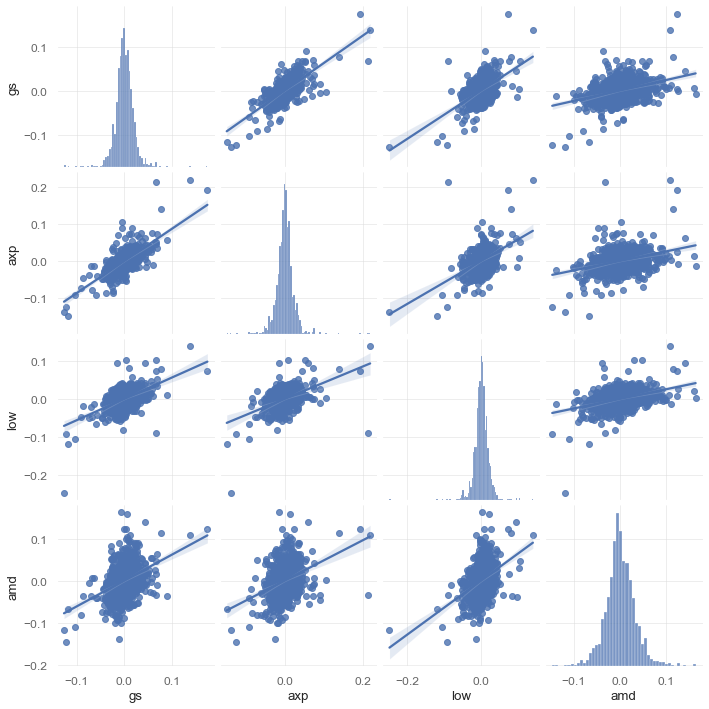

In [6]:
# Pairplots
sns.pairplot(merged_df, kind = 'reg')
plt.show()

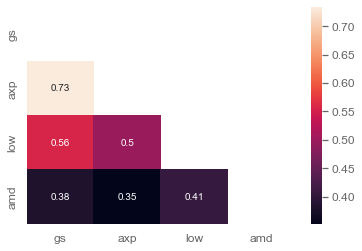

In [7]:
# Correlation Matrix
corr = merged_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

In [8]:
# Loading data from msci world, the american benchmark
msci = qs.utils.download_returns('URTH')
msci = msci.loc[start_date:today]
msci.index = msci.index.tz_localize(None)
msci


[*********************100%%**********************]  1 of 1 completed


Date
2019-07-10    0.004902
2019-07-11    0.002276
2019-07-12    0.002920
2019-07-15   -0.000539
2019-07-16   -0.003021
                ...   
2024-07-02    0.005209
2024-07-03    0.006798
2024-07-05    0.006083
2024-07-08   -0.001063
2024-07-09    0.000599
Name: Close, Length: 1258, dtype: float64

In [9]:
# Removing indexes
msci_no_index = msci.reset_index(drop = True)
gs_no_index = gs.reset_index(drop = True)
axp_no_index = axp.reset_index(drop = True)
low_no_index = low.reset_index(drop = True)
amd_no_index = amd.reset_index(drop = True)

In [10]:
# Fitting linear relation among Apple's returns and Benchmark
X = msci_no_index.values.reshape(-1,1)
y = gs_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_

print('\n')
print('GS beta: ', beta.round(3))
print('\nGS alpha: ', alpha.round(3))
# Alpha measures a stock's excess return relative to its expected performance based on its Beta.



GS beta:  [1.214]

GS alpha:  [0.]


In [11]:
# Fitting linear relation among Tesla's returns and Benchmark
X = msci_no_index.values.reshape(-1,1)
y = axp_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AXP beta: ', beta.round(3))
print('\nAXP alpha: ', alpha.round(3))



AXP beta:  [1.383]

AXP alpha:  [0.]


In [12]:
# Fitting linear relation among Tesla's returns and Benchmark
X = msci_no_index.values.reshape(-1,1)
y = low_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('LOW beta: ', beta.round(3))
print('\nLOW alpha: ', alpha.round(3))



LOW beta:  [1.125]

LOW alpha:  [0.]


In [13]:
# Fitting linear relation among AMD's returns and Benchmark
X = msci_no_index.values.reshape(-1,1)
y = amd_no_index.values.reshape(-1,1)

linreg = LinearRegression().fit(X, y)

beta = linreg.coef_[0]
alpha = linreg.intercept_
print('\n')
print('AMD beta: ', beta.round(3))
print('\nAMD alpha: ', alpha.round(3))



AMD beta:  [1.6]

AMD alpha:  [0.001]


In [14]:
# Calculating Sharpe ratio
# < 1.0 is bad
# = 1.0 is acceptable or good (investment's average return = rf)
# >= 2.0 is very good
print('\n')
print("Sharpe Ratio for GS: ", qs.stats.sharpe(gs).round(2))
print('\n')
print("Sharpe Ratio for AXP: ", qs.stats.sharpe(axp).round(2))
print('\n')
print("Sharpe Ratio for LOW: ", qs.stats.sharpe(low).round(2))
print('\n')
print("Sharpe Ratio for AMD: ", qs.stats.sharpe(amd).round(2))



Sharpe Ratio for GS:  0.67


Sharpe Ratio for AXP:  0.52


Sharpe Ratio for LOW:  0.61


Sharpe Ratio for AMD:  0.9


In [15]:
weights = [0.25, 0.25, 0.25, 0.25] # Defining weights for each stock
portfolio = gs*weights[0] + axp*weights[1] + low*weights[2] + amd*weights[3] # Creating portfolio multiplying each stock for its respective weight 
portfolio # Displaying portfolio's daily returns

Date
2019-07-10    0.000383
2019-07-11    0.006239
2019-07-12    0.011565
2019-07-15    0.008644
2019-07-16   -0.003666
                ...   
2024-07-02    0.014020
2024-07-03   -0.000127
2024-07-05    0.011116
2024-07-08    0.012535
2024-07-09    0.004594
Name: Close, Length: 1258, dtype: float64

[*********************100%%**********************]  1 of 1 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-07-11   2019-07-11
End Period                 2024-07-09   2024-07-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          63.07%       208.83%
CAGR﹪                     6.99%        16.85%

Sharpe                     0.58         0.9
Prob. Sharpe Ratio         90.04%       97.65%
Smart Sharpe               0.53         0.81
Sortino                    0.81         1.29
Smart Sortino              0.72         1.16
Sortino/√2                 0.57         0.91
Smart Sortino/√2           0.51         0.82
Omega                      1.18         1.18

Max Drawdown               -34.01%      -41.87%
Longest DD Days            820          749
Volatility (ann.)          20.32%       30.25%
R^2                        0.8          0.8
Information Ratio          0.06         0.06
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-18,2020-07-28,160,-41.871860,-41.455952
2,2021-11-26,2022-10-14,2023-12-14,749,-34.954506,-33.533478
3,2020-09-03,2020-10-30,2020-11-12,71,-11.257946,-10.877117
4,2019-07-16,2019-08-05,2019-10-31,108,-9.929392,-9.602999
5,2024-03-22,2024-04-17,2024-07-08,109,-8.343950,-8.256541


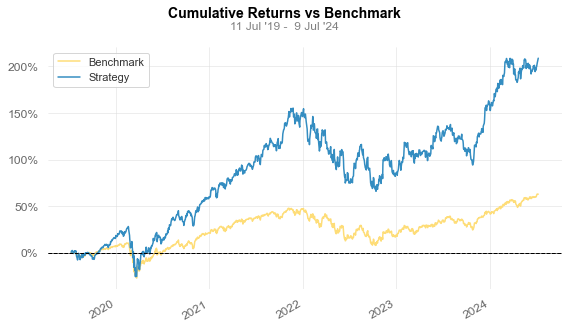

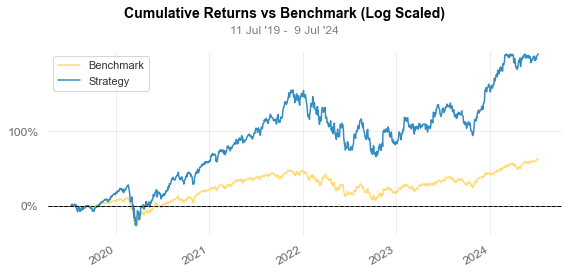

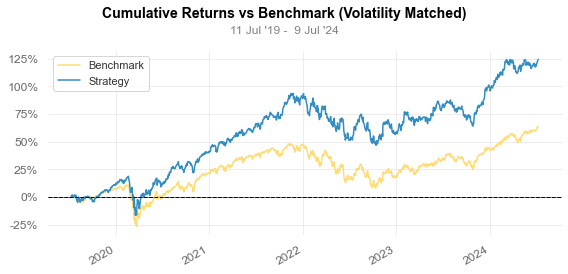

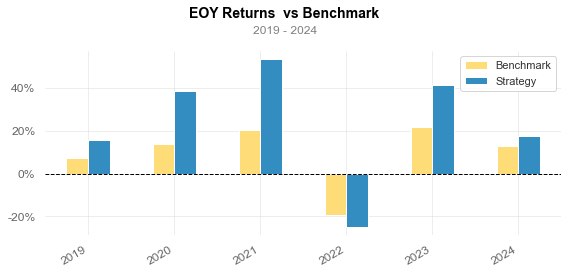

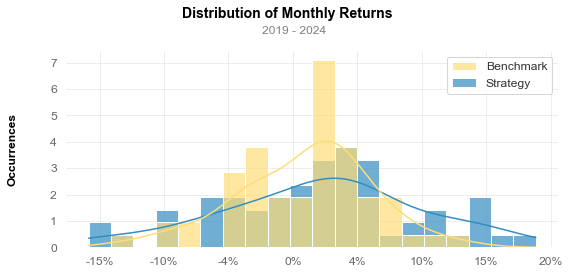

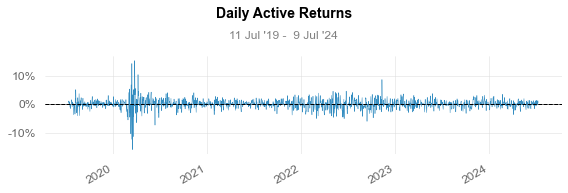

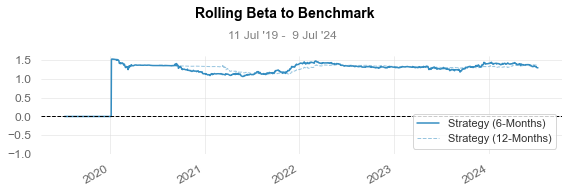

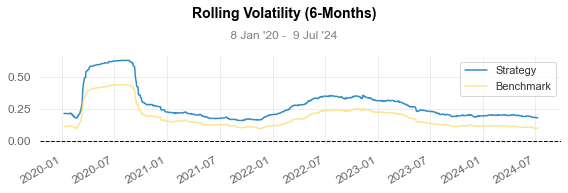

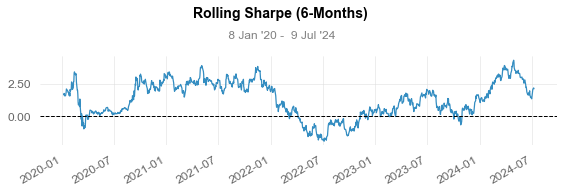

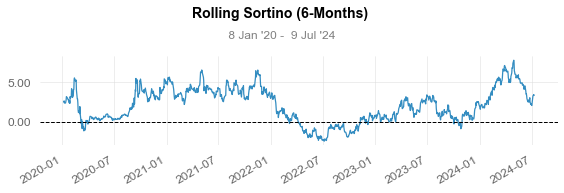

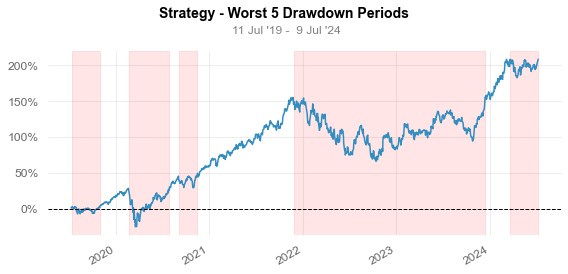

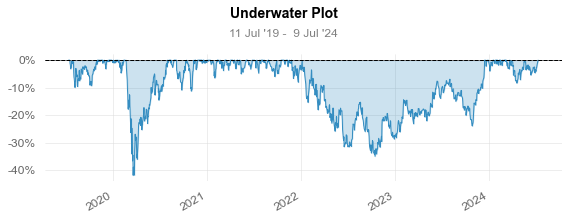

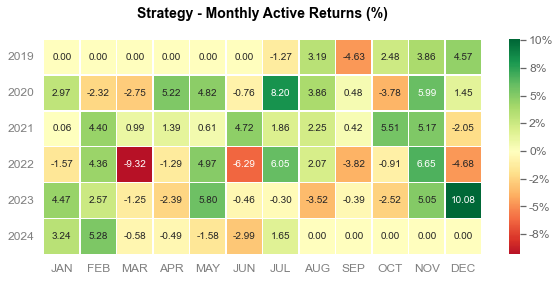

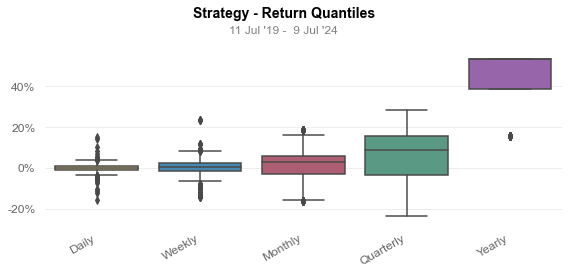

In [16]:
# Generating report on portfolio performance
qs.reports.full(portfolio, benchmark = 'URTH')

# Optimizing Portfolio

Portfolio optimization is the process of selecting the optimal combination of assets and weights to maximize returns and minimize risk. This process involves selecting the most appropriate weights for each asset,by taking into account the historical performance of the assets, their correlations with each other, and other relevant factors such as market conditions and economic outlook. The main goal is to create a well-diversified portfolio that balances risk and returns, and that aligns with the investor's risk tolerance.

In [17]:
# Getting dataframes info for Stocks using yfinance
gs_df = yf.download('GS', start = start_date, end = today)
axp_df = yf.download('AXP', start = start_date, end = today)
low_df = yf.download('LOW', start = start_date, end = today)
amd_df = yf.download('AMD', start = start_date, end = today)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
# Extracting Adjusted Close for each stock
gs_df = gs_df['Adj Close']
axp_df = axp_df['Adj Close']
low_df = low_df['Adj Close']
amd_df = amd_df['Adj Close']

In [19]:
# Merging and creating an Adj Close dataframe for stocks
df = pd.concat([gs_df, axp_df, low_df, amd_df], join = 'outer', axis = 1)
df.columns = ['gs', 'axp', 'low', 'amd']
df

,gs,axp,low,amd
Date,,,,
2019-07-09,183.646606,117.392670,95.740883,33.150002
2019-07-10,182.055634,118.315758,94.115692,33.790001
2019-07-11,186.810959,118.679420,95.750038,33.060001
2019-07-12,189.100235,119.313446,98.060013,33.209999
2019-07-15,187.014236,119.882248,98.580437,34.389999
...,...,...,...,...
2024-07-02,465.609985,235.269226,213.699997,164.309998
2024-07-03,467.920013,235.010010,213.300003,163.899994
2024-07-05,464.750000,235.630005,213.889999,171.899994


In [20]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Markowitz Mean-Variance Optimization Model

- Maximize the expected return of a portfolio while minimizing its risk (allocate weights across a portfolio for maximal Sharpe ratio)

In [21]:
# Calculating the annualized expected returns and the annualized sample covariance matrix

# Expected returns: arithmetic mean of each asset's daily percentage changes
mu = expected_returns.mean_historical_return(df)

# choose a risk model that quantifies the level of risk in each asset.
# Covariance matrix describes the volatilities of assets and the degree to which they are co-dependent.
S = risk_models.sample_cov(df) 

In [22]:
mu

gs     0.208579
axp    0.151843
low    0.177379
amd    0.398873
dtype: float64

In [23]:
S

,gs,axp,low,amd
gs,0.105015,0.090530,0.058975,0.064907
axp,0.090530,0.144791,0.062191,0.070022
low,0.058975,0.062191,0.107051,0.069432
amd,0.064907,0.070022,0.069432,0.273900


In [24]:
# Objective: maximize Sharpe ratio

ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
weights = ef.max_sharpe() # Optimizing weights for Sharpe ratio maximization 

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

# Printing optimized weights and expected performance for portfolio
clean_weights

OrderedDict([('gs', 0.43528),
             ('axp', 0.0),
             ('low', 0.09063),
             ('amd', 0.47409)])

In [25]:
# Creating new portfolio with optimized weights
new_weights = list(clean_weights.values())
optimized_portfolio = gs*new_weights[0] + axp*new_weights[1] + low*new_weights[2] + amd*new_weights[3]
optimized_portfolio 

Date
2019-07-10    0.003843
2019-07-11    0.002701
2019-07-12    0.009672
2019-07-15    0.012524
2019-07-16   -0.000573
                ...   
2024-07-02    0.021793
2024-07-03    0.000807
2024-07-05    0.020442
2024-07-08    0.020173
2024-07-09    0.002940
Name: Close, Length: 1258, dtype: float64

# Markowitz Mean-Variance Optimization Model vs Original Portfolio

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-07-10   2019-07-10
End Period                 2024-07-09   2024-07-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          208.95%      297.38%
CAGR﹪                     16.84%       20.97%

Sharpe                     0.9          0.97
Prob. Sharpe Ratio         97.65%       98.47%
Smart Sharpe               0.82         0.88
Sortino                    1.29         1.42
Smart Sortino              1.17         1.29
Sortino/√2                 0.91         1.01
Smart Sortino/√2           0.83         0.91
Omega                      1.19         1.19

Max Drawdown               -41.87%      -45.74%
Longest DD Days            749          761
Volatility (ann.)          30.24%       34.61%
R^2                        0.88         0.88
Information Ratio          0.03         0.03
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-26,2022-10-14,2023-12-26,761,-45.736331,-44.312067
2,2020-02-20,2020-03-18,2020-07-21,153,-37.916205,-36.729675
3,2024-03-08,2024-04-19,2024-07-08,123,-14.476884,-13.054831
4,2020-09-03,2020-09-23,2020-11-18,77,-13.613841,-12.547378
5,2019-07-25,2019-08-05,2019-10-31,99,-13.020165,-12.342360


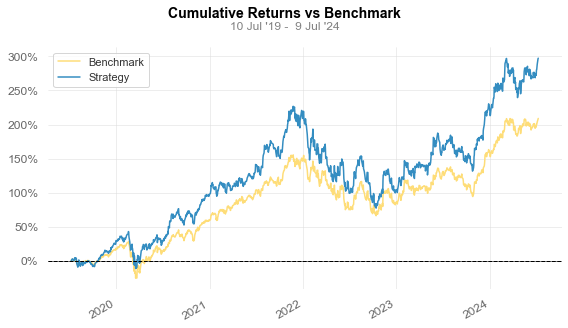

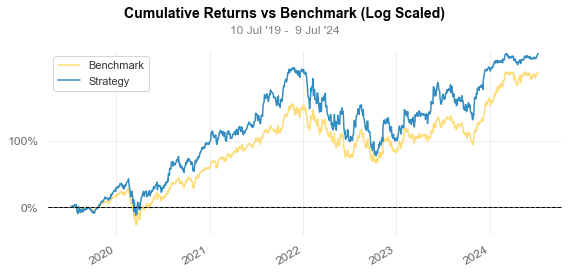

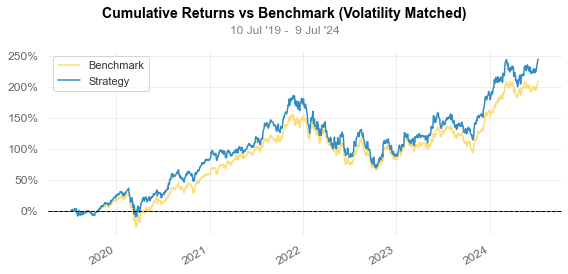

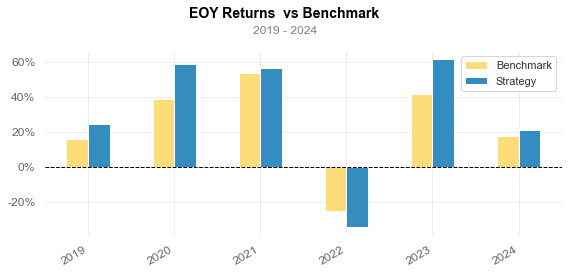

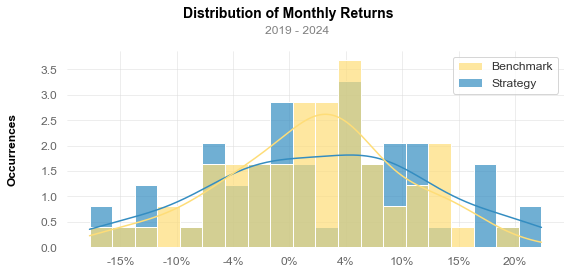

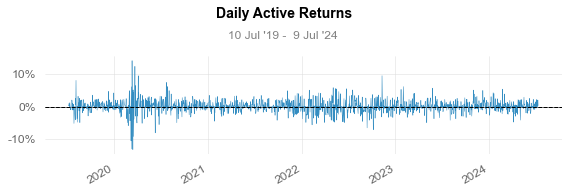

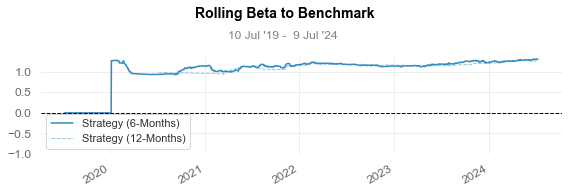

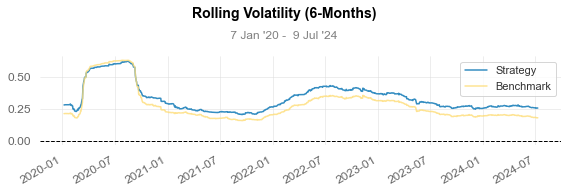

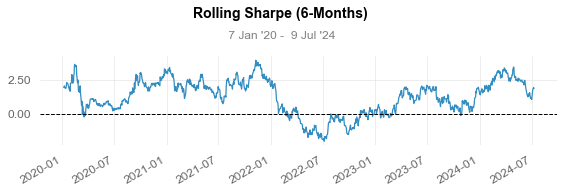

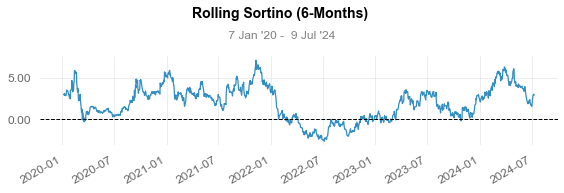

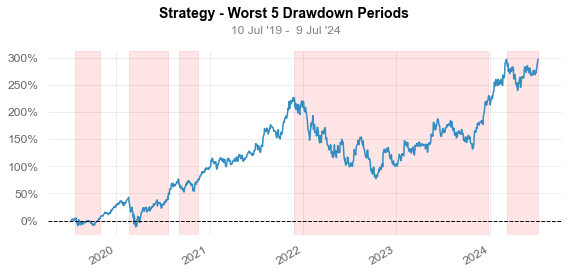

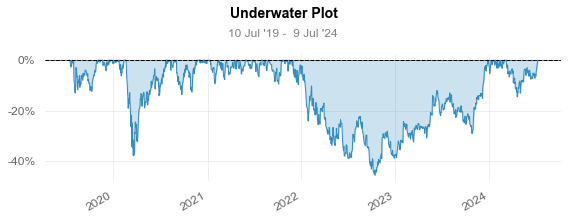

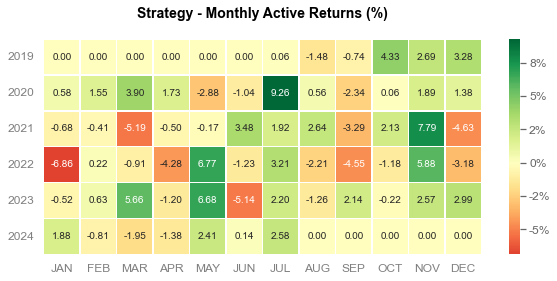

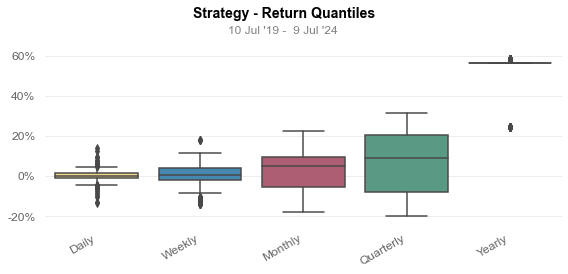

In [26]:
qs.reports.full(optimized_portfolio, benchmark = portfolio)

# Black-Litterman Allocation Model

- A Bayesian approach to asset allocation: it combines a prior estimate of returns with the investor's particular views on the expected returns to generate an optimal allocation. Multiple sources of information can be used to establish the prior estimate of returns, and the model allows investors to provide a confidence level for their views, which is then used to optimize allocation.
- The Black-Litterman formula calculates a weighted average between the prior estimate of returns and the views, with the weighting determined by the level of confidence for each view.

In [27]:
# Mapping assets 
assets = ['GS', 'AXP', 'LOW', 'AMD']

- A commonly used approach for determining a prior estimate of returns involves relying on the market's expectations, which are reflected in the asset's market capitalization.

In [28]:
# Obtaining market cap for stocks
market_caps = {}
for asset in assets:
    ticker = yf.Ticker(asset)
    info = ticker.info
    market_caps[asset] = info.get('marketCap')

# Convert to a DataFrame for visualization or further analysis
market_caps_df = pd.DataFrame(list(market_caps.items()), columns=['Ticker', 'Market Cap'])
market_caps_df

,Ticker,Market Cap
0,GS,152470175744
1,AXP,171014275072
2,LOW,123739684864
3,AMD,288820002816


In [29]:
# Obtaining closing prices for MSCI World
market_prices = yf.download('URTH',start = start_date, end = today)['Adj Close']
market_prices

[*********************100%%**********************]  1 of 1 completed


Date
2019-07-09     84.392540
2019-07-10     84.806244
2019-07-11     84.999290
2019-07-12     85.247498
2019-07-15     85.201515
                 ...    
2024-07-02    148.580002
2024-07-03    149.589996
2024-07-05    150.500000
2024-07-08    150.339996
2024-07-09    150.429993
Name: Adj Close, Length: 1259, dtype: float64

In [30]:
# Obtaining market-implied risk aversion, the delta

# Estimate the level of risk aversion among market participants, represented by a parameter known as delta, 
# which we calculate using the closing prices of MSCI World. 
# The higher the value for delta, the greater the market's risk aversion.

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

2.8374683036144845

In [31]:
# Changing columns and index to uppercase so it matches market_caps
S.index = S.index.str.upper()
S.columns = S.columns.str.upper()
S

,GS,AXP,LOW,AMD
GS,0.105015,0.090530,0.058975,0.064907
AXP,0.090530,0.144791,0.062191,0.070022
LOW,0.058975,0.062191,0.107051,0.069432
AMD,0.064907,0.070022,0.069432,0.273900


In [32]:
# Obtaining Prior estimates 
# Calculate the prior expected returns for each stock based on its 
# market capitalization, delta, and covariance matrix S,
prior = black_litterman.market_implied_prior_returns(market_caps, delta, S)
prior

GS     0.241809
AXP    0.276295
LOW    0.224036
AMD    0.442397
dtype: float64

In [33]:
# Provide the model with our views on these stocks and our confidence levels in our views.

# GS will raise by 2%
# AXP will raise by 3%
# AMD will outperform LOW by 25%

Q = np.array([0.02, 0.03, 0.25])

# Linking views to assets
P = np.array([
    [1,0,0,0], # GS = 0.02
    [0,1,0,0], # AXP = 0.03
    [0,0,-1,1] # AMD > LOW by 0.25
])

# Providing confidence levels
# Closer to 0.0 = Low confidence
# Closer to 1.0 = High confidence
confidences = [0.5,
               0.4,
               0.8]

# Creating model
bl = BlackLittermanModel(S, # Covariance Matrix
                         pi = prior, # Prior expected returns
                         Q = Q, # Vector of views
                         P = P, # Matrix mapping the views
                         omega = 'idzorek', # Method to estimate uncertainty level of the views based on historical data
                         view_confidences = confidences) # Confidences

rets = bl.bl_returns() # Calculating Expected returns
ef = EfficientFrontier(rets, S) # Optimizing asset allocation

ef.max_sharpe() # Optimizing weights for maximal Sharpe ratio
weights = ef.clean_weights() # Cleaning weights
weights

OrderedDict([('GS', 0.0),
             ('AXP', 0.03467),
             ('LOW', 0.18007),
             ('AMD', 0.78527)])

In [34]:
# Building Black-Litterman portfolio
black_litterman_weights = list(weights.values())
black_litterman_portfolio = gs*black_litterman_weights[0] + axp*black_litterman_weights[1] + low*black_litterman_weights[2] + amd*black_litterman_weights[3]

# Black-Litterman Portfolio daily returns
black_litterman_portfolio

Date
2019-07-10    0.012376
2019-07-11   -0.013731
2019-07-12    0.008092
2019-07-15    0.029023
2019-07-16   -0.014920
                ...   
2024-07-02    0.033405
2024-07-03   -0.002335
2024-07-05    0.038816
2024-07-08    0.033598
2024-07-09   -0.007188
Name: Close, Length: 1258, dtype: float64

# Black-Litterman vs Original Portfolio

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-07-10   2019-07-10
End Period                 2024-07-09   2024-07-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          208.95%      382.42%
CAGR﹪                     16.84%       24.26%

Sharpe                     0.9          0.93
Prob. Sharpe Ratio         97.65%       98.16%
Smart Sharpe               0.83         0.86
Sortino                    1.29         1.4
Smart Sortino              1.19         1.29
Sortino/√2                 0.91         0.99
Smart Sortino/√2           0.84         0.92
Omega                      1.18         1.18

Max Drawdown               -41.87%      -58.0%
Longest DD Days            749          774
Volatility (ann.)          30.24%       44.36%
R^2                        0.68         0.68
Information Ratio          0.03         0.03
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-30,2022-10-14,2024-01-12,774,-57.995163,-56.560433
2,2020-02-20,2020-03-18,2020-07-17,149,-36.449466,-35.415433
3,2024-03-08,2024-05-01,2024-07-09,124,-26.359823,-25.470726
4,2021-01-12,2021-03-08,2021-06-29,169,-18.811015,-16.168614
5,2019-07-16,2019-08-05,2019-10-31,108,-16.662533,-14.619038


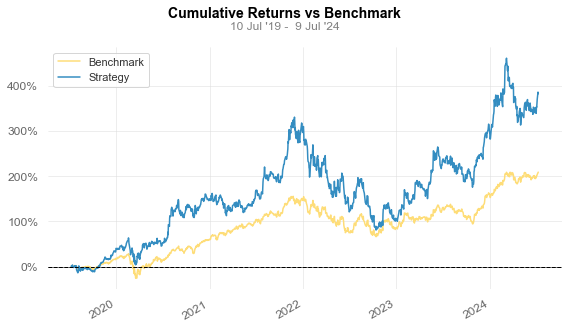

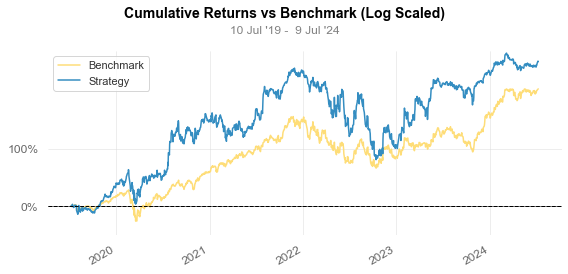

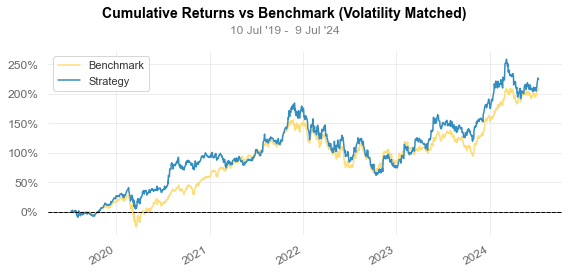

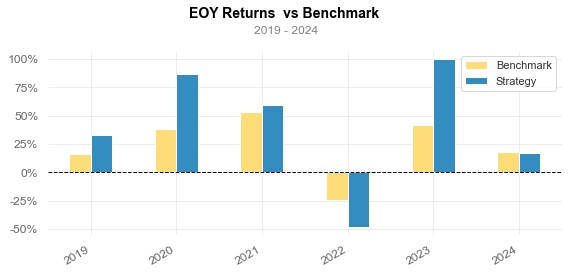

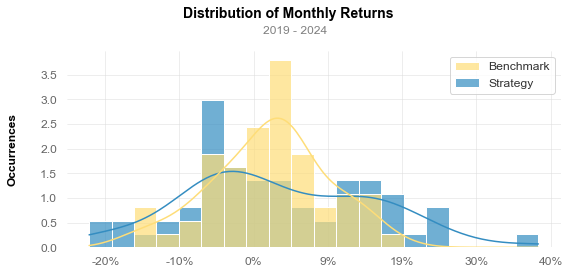

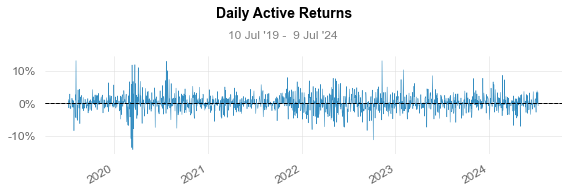

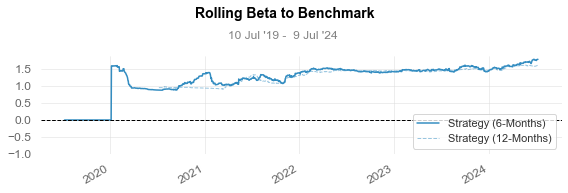

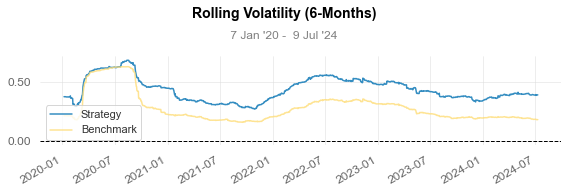

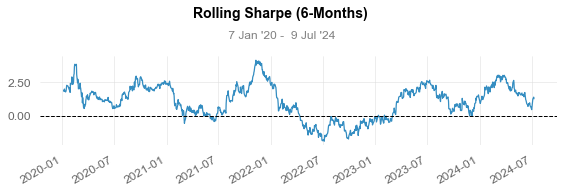

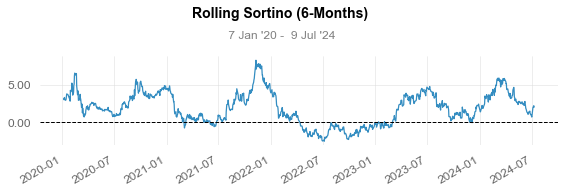

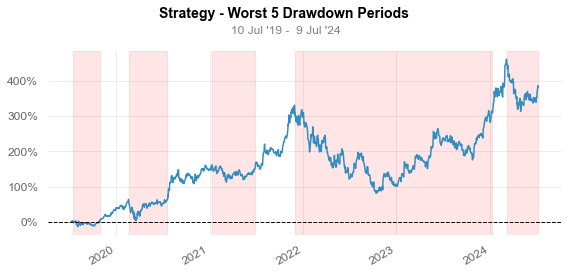

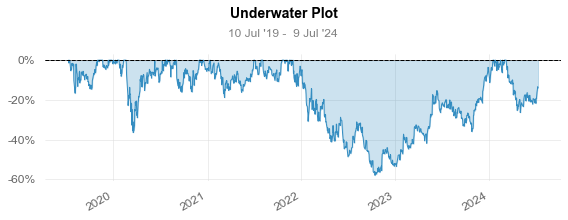

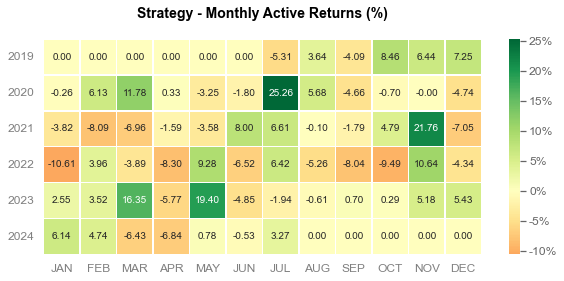

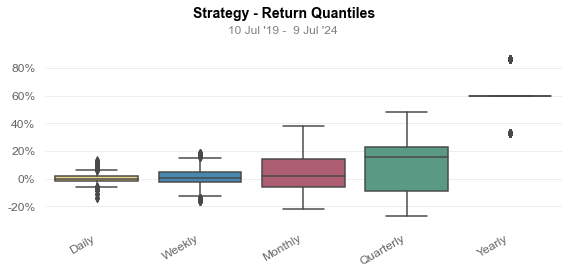

In [35]:
qs.reports.full(black_litterman_portfolio, benchmark = portfolio)

# Black-Litterman vs Markowitz Mean-Variance Optimization Model

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-07-10   2019-07-10
End Period                 2024-07-09   2024-07-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          297.38%      382.42%
CAGR﹪                     20.97%       24.26%

Sharpe                     0.97         0.93
Prob. Sharpe Ratio         98.47%       98.16%
Smart Sharpe               0.9          0.86
Sortino                    1.42         1.4
Smart Sortino              1.32         1.29
Sortino/√2                 1.01         0.99
Smart Sortino/√2           0.93         0.92
Omega                      1.18         1.18

Max Drawdown               -45.74%      -58.0%
Longest DD Days            761          774
Volatility (ann.)          34.61%       44.36%
R^2                        0.88         0.88
Information Ratio          0.03         0.03
Calmar              

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-30,2022-10-14,2024-01-12,774,-57.995163,-56.560433
2,2020-02-20,2020-03-18,2020-07-17,149,-36.449466,-35.415433
3,2024-03-08,2024-05-01,2024-07-09,124,-26.359823,-25.470726
4,2021-01-12,2021-03-08,2021-06-29,169,-18.811015,-16.168614
5,2019-07-16,2019-08-05,2019-10-31,108,-16.662533,-14.619038


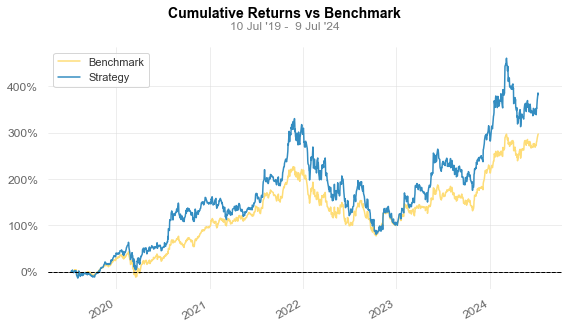

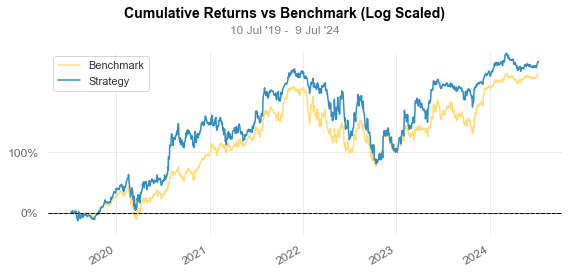

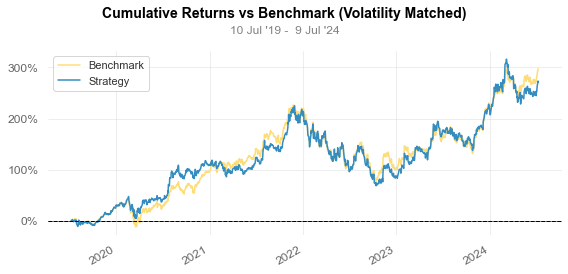

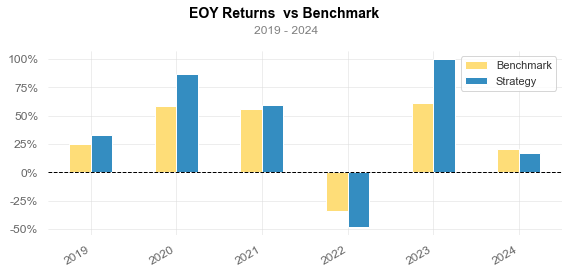

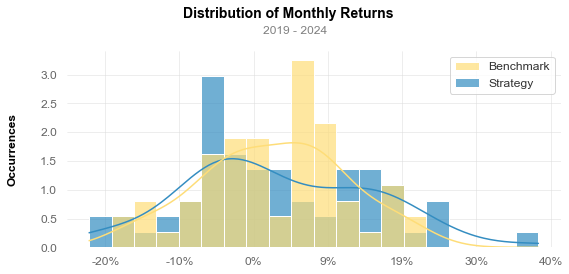

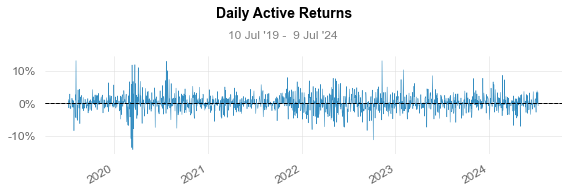

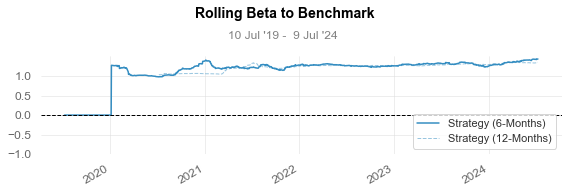

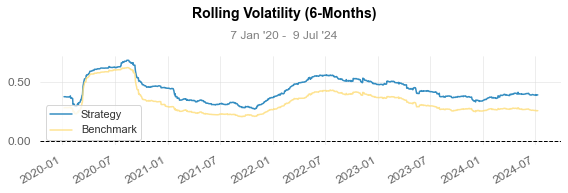

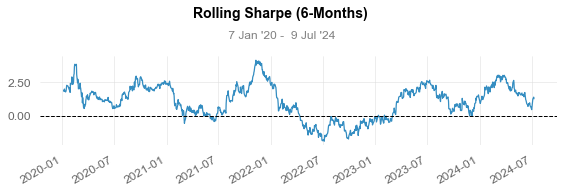

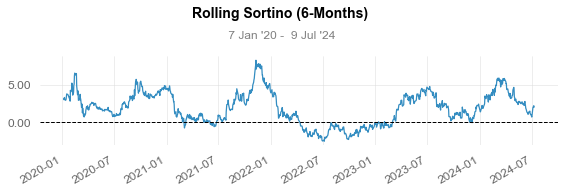

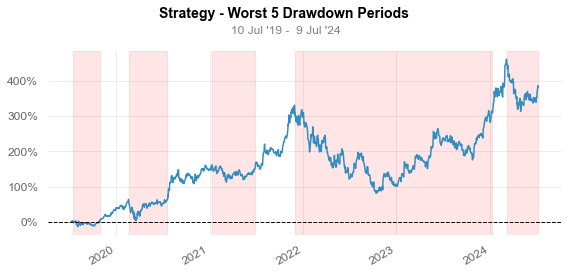

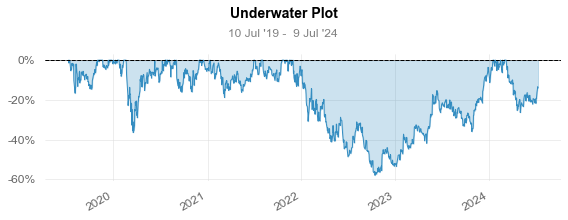

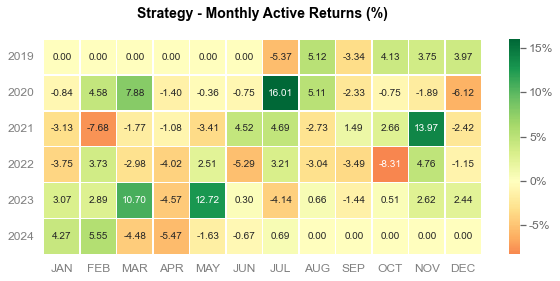

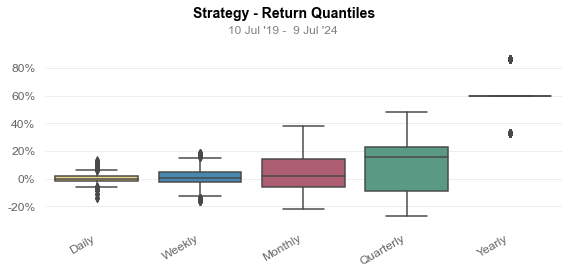

In [36]:
qs.reports.full(black_litterman_portfolio, benchmark = optimized_portfolio)